# Water pump data predictions

## Group:
    
- Isaac Gonzales Vizcarra
- Ibrahim Sobh
- Anthony Siampiringue


## Dataset:
    https://www.kaggle.com/datasets/nphantawee/pump-sensor-data
        
## Description:
- Data driven prediction models of water pump sensor.

## Anomalies:
- Detect atypical peak when compared to surrounding past measurements that are lower. 
- Detect RECOVERING and BROKEN status         

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15, 5)

In [30]:
from utils.style_results import *

columns = ["sensor","Accuracy", "Precision", "Recall", "F1"]
columns_n = ["FNR", "FPR"]


In [31]:
heuristics = pd.read_csv("../results/Heuristics_Results.csv")
heuristics.drop(columns=["Unnamed: 0"], inplace=True)
heuristics

,Sensor,Method,Accuracy,F1,Recall,Precision,FNR,FPR
0,sensor_00,Cutoff,97.80,85.63,99.92,74.92,0.01,25.08
1,sensor_00,IQR,91.54,60.83,100.00,43.71,0.00,56.29
2,sensor_00,Z-Score,99.10,93.58,99.66,88.21,0.02,11.79
3,sensor_00,Z-Score-Local,99.10,93.48,97.96,89.40,0.14,10.60
4,sensor_01,Cutoff,96.64,75.90,80.52,71.79,1.38,28.21
5,sensor_01,IQR,97.95,83.77,80.43,87.40,1.37,12.60
6,sensor_01,Z-Score,95.32,69.31,80.35,60.94,1.41,39.06
7,sensor_01,Z-Score-Local,92.85,59.95,81.37,47.46,1.38,52.54
8,sensor_02,Cutoff,97.91,83.50,80.35,86.91,1.38,13.09
9,sensor_02,IQR,95.82,73.91,90.09,62.66,0.72,37.34


In [32]:
hmm = pd.read_csv("../results/hmm_results")
# rename column
hmm.rename(columns={"sensor": "Sensor"}, inplace=True)
hmm.drop(columns=["Unnamed: 0"], inplace=True)
hmm

,Sensor,Method,Accuracy,F1,Recall,Precision,FNR,FPR
0,sensor_00,gaussian_hmm,98.89,92.21,99.74,85.73,0.26,1.17
1,sensor_01,gaussian_hmm,96.15,73.35,80.61,67.29,19.39,2.76
2,sensor_02,gaussian_hmm,95.19,71.41,91.31,58.63,8.69,4.53
3,sensor_04,gaussian_hmm,97.33,74.82,60.37,98.37,39.63,0.07
4,sensor_10,gaussian_hmm,98.31,88.59,99.74,79.68,0.26,1.79
5,sensor_42,gaussian_hmm,96.00,65.30,57.24,76.00,42.76,1.27
6,sensor_49,gaussian_hmm,96.27,76.18,90.64,65.70,9.36,3.33


In [45]:
Complete_Results = pd.concat([heuristics, hmm], axis=0).reset_index(drop=True)
Complete_Results.sort_values(by=["Sensor"], inplace=True)
Complete_Results

,Sensor,Method,Accuracy,F1,Recall,Precision,FNR,FPR
0,sensor_00,Cutoff,97.80,85.63,99.92,74.92,0.01,25.08
3,sensor_00,Z-Score-Local,99.10,93.48,97.96,89.40,0.14,10.60
28,sensor_00,gaussian_hmm,98.89,92.21,99.74,85.73,0.26,1.17
1,sensor_00,IQR,91.54,60.83,100.00,43.71,0.00,56.29
2,sensor_00,Z-Score,99.10,93.58,99.66,88.21,0.02,11.79
4,sensor_01,Cutoff,96.64,75.90,80.52,71.79,1.38,28.21
5,sensor_01,IQR,97.95,83.77,80.43,87.40,1.37,12.60
6,sensor_01,Z-Score,95.32,69.31,80.35,60.94,1.41,39.06
7,sensor_01,Z-Score-Local,92.85,59.95,81.37,47.46,1.38,52.54
29,sensor_01,gaussian_hmm,96.15,73.35,80.61,67.29,19.39,2.76


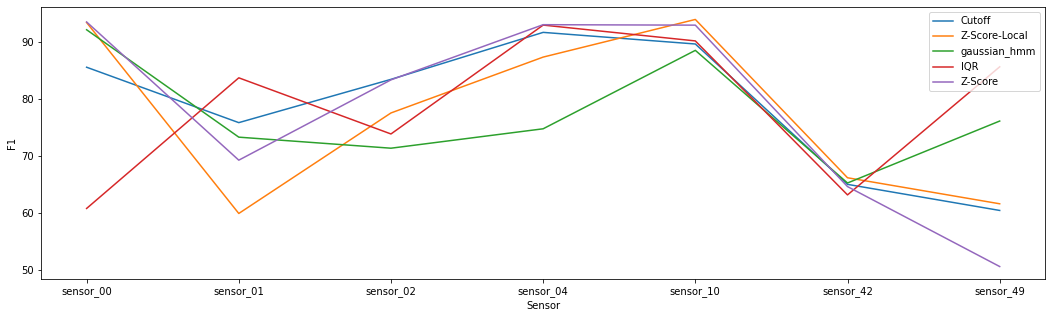

In [52]:
import seaborn as sns
plt.rcParams['figure.figsize'] = (18, 5)
sns.lineplot(x='Sensor',y='F1',hue='Method',data=Complete_Results)
plt.legend(loc='upper right')

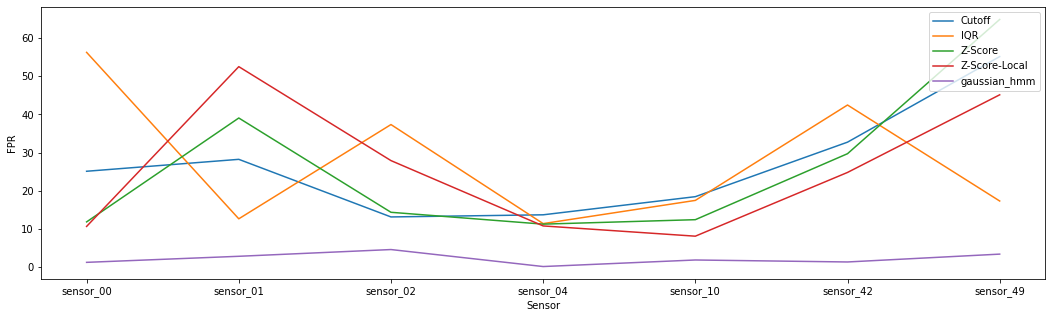

In [39]:
plt.rcParams['figure.figsize'] = (18, 5)
sns.lineplot(x='Sensor',y='FPR',hue='Method',data=Complete_Results)
plt.legend(loc='upper right')

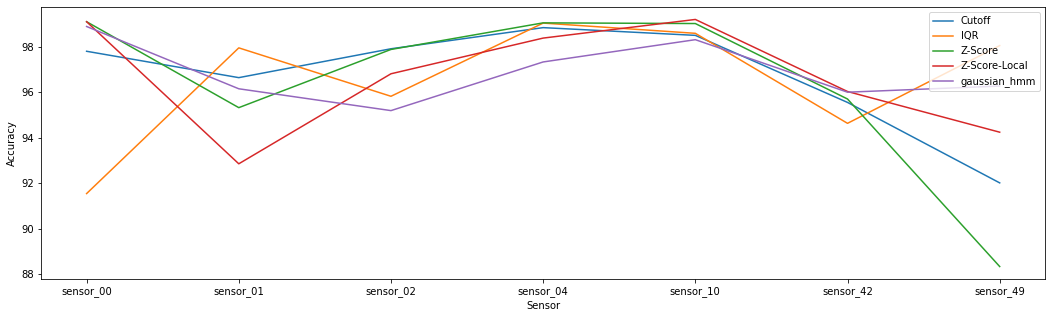

In [41]:
plt.rcParams['figure.figsize'] = (18, 5)
sns.lineplot(x='Sensor',y='Accuracy',hue='Method',data=Complete_Results)
plt.legend(loc='upper right')

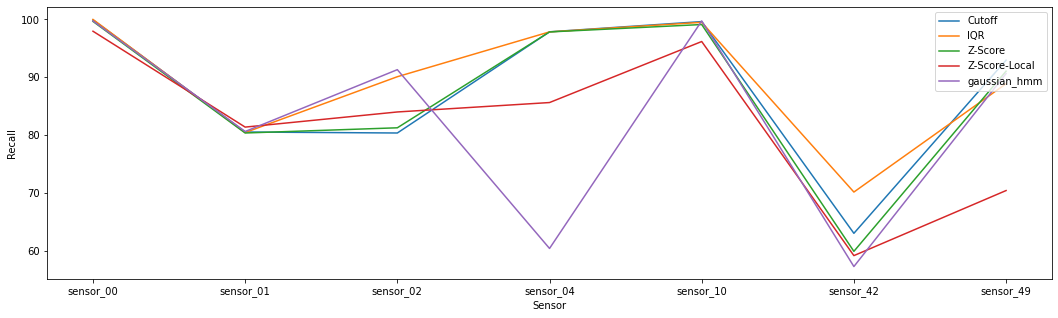

In [43]:
plt.rcParams['figure.figsize'] = (18, 5)
sns.lineplot(x='Sensor',y='Recall',hue='Method',data=Complete_Results)
plt.legend(loc='upper right')